In [23]:
import pandas as pd
import matplotlib.pyplot as plt

import torch

import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [24]:
norm_info = pd.read_csv('../MAML+Arbiter_5way_5shot/MAML+Arbiter_5way_5shot_inner_loop.csv')
#norm_info = pd.read_csv('../MAML+Arbiter_5way_5shot__7105/MAML+Arbiter_5way_5shot_filter64_inner_loop.csv')

C:\Users\JM\anaconda3\envs\maml\lib\site-packages\IPython\core\interactiveshell.py:3553: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [25]:
norm_info_train = norm_info[norm_info['phase']=='train']
norm_info_val = norm_info[norm_info['phase']=='val']
norm_info_test= norm_info[norm_info['current_iter']=='test']

In [26]:
per_inner_loop_step = norm_info_train.groupby('num_step').mean()
per_inner_loop_step

,layer_dict.conv0.conv.weight_alpha,layer_dict.conv0.conv.weight_grad_mean,layer_dict.conv0.conv.weight_grad_L1norm,layer_dict.conv0.conv.weight_grad_L2norm,layer_dict.conv0.conv.weight_grad_var,layer_dict.conv0.conv.weight_gsnr,layer_dict.conv0.conv.weight_weight_mean,layer_dict.conv0.conv.weight_weight_L1norm,layer_dict.conv0.conv.weight_weight_L2norm,layer_dict.conv0.conv.weight_weight_var,...,layer_dict.linear.bias_weight_L1norm,layer_dict.linear.bias_weight_L2norm,layer_dict.linear.bias_weight_var,all_grads_var,all_grads_l2norm,all_grads_mean,all_weights_norm,all_weights_var,all_weights_mean,gsnr
num_step,,,,,,,,,,,,,,,,,,,,,
0,0.088881,0.000003,3.250375,0.088881,0.000036,0.015314,-0.000329,132.479900,2.661113,0.002055,...,0.013376,0.006794,0.000011,0.003000,34.498413,0.000019,23.902669,0.001243,-0.001845,0.002872
1,0.079947,-0.000023,3.011071,0.079947,0.000030,0.031524,-0.000329,132.479850,2.661115,0.002055,...,0.014073,0.007159,0.000014,0.002847,33.586637,-0.000212,23.905217,0.001243,-0.001843,0.002863
2,0.073526,-0.000021,2.812880,0.073526,0.000025,0.029583,-0.000329,132.479782,2.661116,0.002055,...,0.014795,0.007534,0.000019,0.002615,32.146123,-0.000287,23.907499,0.001244,-0.001840,0.002853
3,0.070034,-0.000015,2.653670,0.070034,0.000022,0.023304,-0.000328,132.479685,2.661118,0.002055,...,0.015523,0.007920,0.000025,0.002330,30.359919,-0.000219,23.909496,0.001244,-0.001838,0.002844
4,0.068109,-0.000011,2.491775,0.068109,0.000020,0.016295,-0.000328,132.479658,2.661119,0.002055,...,0.016211,0.008279,0.000032,0.002165,29.282631,-0.000121,23.911353,0.001244,-0.001836,0.002838


In [27]:
per_inner_loop_step['layer_dict.conv0.conv.weight_grad_mean']

num_step
0    0.000003
1   -0.000023
2   -0.000021
3   -0.000015
4   -0.000011
Name: layer_dict.conv0.conv.weight_grad_mean, dtype: float64

In [28]:
per_inner_loop_step['layer_dict.linear.weights_grad_L2norm']

num_step
0    1.804441
1    1.407802
2    1.012882
3    0.735189
4    0.640693
Name: layer_dict.linear.weights_grad_L2norm, dtype: float64

In [29]:
per_inner_loop_step['layer_dict.linear.weights_weight_L2norm']

num_step
0    2.721340
1    2.722063
2    2.723044
3    2.724024
4    2.725114
Name: layer_dict.linear.weights_weight_L2norm, dtype: float64

In [30]:
per_inner_loop_step['layer_dict.conv3.conv.weight_grad_L2norm']

num_step
0    30.992976
1    30.165385
2    28.877659
3    27.267068
4    26.295363
Name: layer_dict.conv3.conv.weight_grad_L2norm, dtype: float64

In [31]:
per_inner_loop_step['layer_dict.conv3.conv.weight_weight_L2norm']

num_step
0    12.872191
1    12.876299
2    12.880073
3    12.883436
4    12.886561
Name: layer_dict.conv3.conv.weight_weight_L2norm, dtype: float64

In [32]:
# specific_column_values = norm_info_train[norm_info_train['num_step'] == 0]
specific_column_values = norm_info_train
specific_column_values

,current_iter,phase,num_step,layer_dict.conv0.conv.weight_alpha,layer_dict.conv0.conv.weight_grad_mean,layer_dict.conv0.conv.weight_grad_L1norm,layer_dict.conv0.conv.weight_grad_L2norm,layer_dict.conv0.conv.weight_grad_var,layer_dict.conv0.conv.weight_gsnr,layer_dict.conv0.conv.weight_weight_mean,...,layer_dict.linear.bias_weight_L1norm,layer_dict.linear.bias_weight_L2norm,layer_dict.linear.bias_weight_var,all_grads_var,all_grads_l2norm,all_grads_mean,all_weights_norm,all_weights_var,all_weights_mean,gsnr
0,0,train,0,9.759704e-01,4.850604e-05,3.748490e+01,9.759703e-01,2.756903e-04,0.000009,-0.000919,...,0.018479,0.010351,0.000027,0.000012,2.339282,-0.000021,20.008966,0.000866,-0.000010,1.084541e-07
1,0,train,1,9.664180e-01,-7.585537e-04,3.876363e+01,9.664181e-01,2.697468e-04,0.002133,-0.000912,...,0.036695,0.020570,0.000106,0.000012,2.328760,-0.000022,20.008968,0.000866,-0.000009,1.035454e-07
2,0,train,2,9.522777e-01,-2.974216e-04,3.967718e+01,9.522777e-01,2.623812e-04,0.000337,-0.000909,...,0.054776,0.030734,0.000236,0.000012,2.319361,-0.000020,20.008978,0.000866,-0.000009,9.916766e-08
3,0,train,3,9.326254e-01,-1.807288e-03,3.916874e+01,9.326254e-01,2.484810e-04,0.013145,-0.000891,...,0.072734,0.040863,0.000417,0.000012,2.307791,-0.000023,20.009001,0.000866,-0.000009,9.435913e-08
4,0,train,4,9.033664e-01,3.615363e-04,3.563390e+01,9.033664e-01,2.360692e-04,0.000554,-0.000894,...,0.090585,0.050998,0.000650,0.000011,2.292066,-0.000004,20.009031,0.000866,-0.000009,9.357229e-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1196995,74999,train,0,1.966049e-10,2.837427e-13,6.782288e-09,1.966049e-10,1.110717e-23,0.007248,-0.000237,...,0.018747,0.008596,0.000014,0.007867,60.310509,0.000179,27.480654,0.001625,-0.002946,5.341625e-03
1196996,74999,train,1,2.936767e-10,-9.851566e-13,9.906609e-09,2.936767e-10,2.399185e-23,0.040453,-0.000237,...,0.018747,0.008596,0.000014,0.007564,59.140453,-0.000702,27.485359,0.001625,-0.002939,5.314220e-03
1196997,74999,train,2,5.762910e-10,-1.832609e-12,1.931438e-08,5.762910e-10,9.276540e-23,0.036204,-0.000237,...,0.018747,0.008596,0.000014,0.007046,57.081219,-0.001222,27.489143,0.001626,-0.002927,5.268443e-03
1196998,74999,train,3,2.069481e-09,-4.893864e-12,7.043965e-08,2.069481e-09,1.215624e-21,0.019702,-0.000237,...,0.018747,0.008596,0.000014,0.006137,53.270348,-0.000994,27.489447,0.001626,-0.002917,5.232410e-03


In [33]:
gr = specific_column_values.groupby('current_iter').mean()

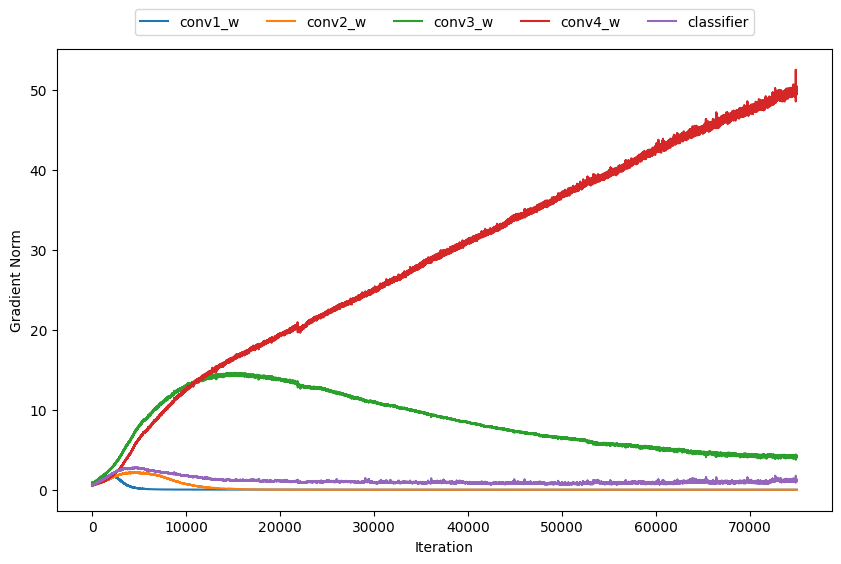

In [34]:
 # 그래프를 그릴 컬럼들의 리스트
columns_to_plot = [ 'layer_dict.conv0.conv.weight_grad_L2norm', 
                    'layer_dict.conv1.conv.weight_grad_L2norm', 
                    'layer_dict.conv2.conv.weight_grad_L2norm',
                    'layer_dict.conv3.conv.weight_grad_L2norm',
                    'layer_dict.linear.weights_grad_L2norm']
columns_to_plot_label = ['conv1_w', 'conv2_w', 'conv3_w', 'conv4_w', 'classifier']

# 특정 열(Column)의 값을 그래프로 그리기
plt.figure(figsize=(10, 6))  # 그래프의 크기 설정 

plt.plot(gr[columns_to_plot].values, label=columns_to_plot_label)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), shadow=False, ncol=len(columns_to_plot))  # 범례 추가
plt.xlabel('Iteration')  # X 축 라벨 설정
plt.ylabel('Gradient Norm')  

# plt.yscale('log')  # Y 축을 로그 스케일로 변경
# plt.ylim(10 ** -5, 10 **2)

plt.show()  # 그래프 보여주기

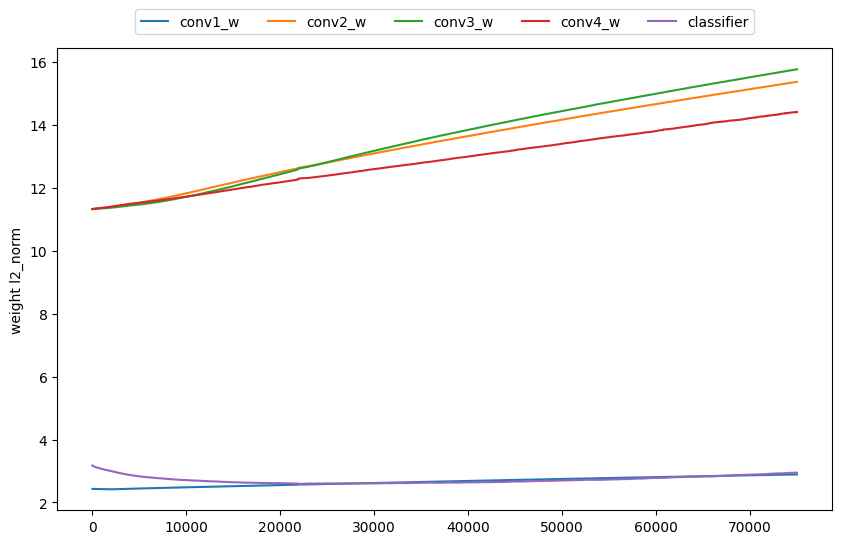

In [35]:
 # 그래프를 그릴 컬럼들의 리스트
columns_to_plot = [ 'layer_dict.conv0.conv.weight_weight_L2norm', 
                    'layer_dict.conv1.conv.weight_weight_L2norm', 
                    'layer_dict.conv2.conv.weight_weight_L2norm',
                    'layer_dict.conv3.conv.weight_weight_L2norm',
                    'layer_dict.linear.weights_weight_L2norm']
columns_to_plot_label = ['conv1_w', 'conv2_w', 'conv3_w', 'conv4_w', 'classifier']

# 특정 열(Column)의 값을 그래프로 그리기
plt.figure(figsize=(10, 6))  # 그래프의 크기 설정 

plt.plot(gr[columns_to_plot].values, label=columns_to_plot_label)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), shadow=False, ncol=len(columns_to_plot))  # 범례 추가
plt.ylabel('weight l2_norm')  

# plt.yscale('log')  # Y 축을 로그 스케일로 변경
# plt.ylim(10 ** -5, 10 **2)

plt.show()  # 그래프 보여주기

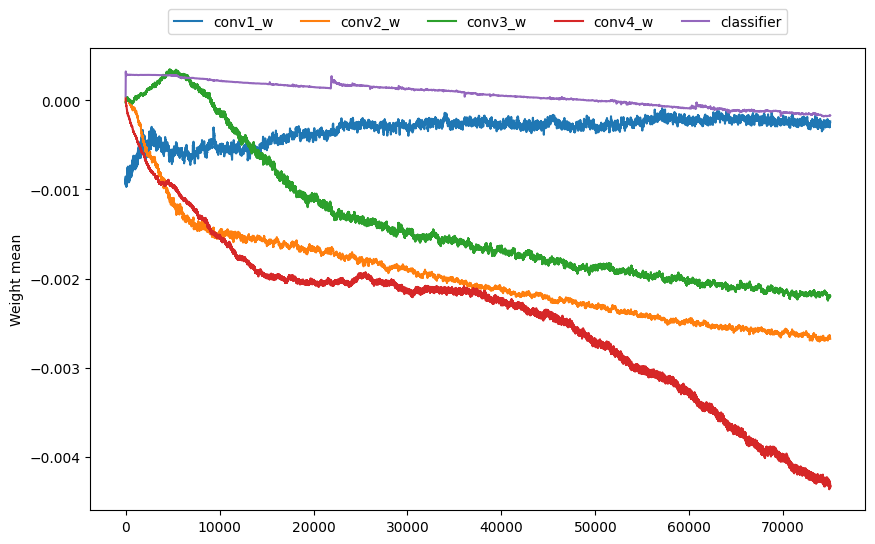

In [36]:
 # 그래프를 그릴 컬럼들의 리스트
columns_to_plot = [ 'layer_dict.conv0.conv.weight_weight_mean', 
                    'layer_dict.conv1.conv.weight_weight_mean', 
                    'layer_dict.conv2.conv.weight_weight_mean',
                    'layer_dict.conv3.conv.weight_weight_mean',
                    'layer_dict.linear.weights_weight_mean']
columns_to_plot_label = ['conv1_w', 'conv2_w', 'conv3_w', 'conv4_w', 'classifier']

# 특정 열(Column)의 값을 그래프로 그리기
plt.figure(figsize=(10, 6))  # 그래프의 크기 설정 

plt.plot(gr[columns_to_plot].values, label=columns_to_plot_label)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), shadow=False, ncol=len(columns_to_plot))  # 범례 추가
plt.ylabel('Weight mean')  

# plt.yscale('log')  # Y 축을 로그 스케일로 변경
# plt.ylim(10 ** -5, 10 **2)

plt.show()  # 그래프 보여주기

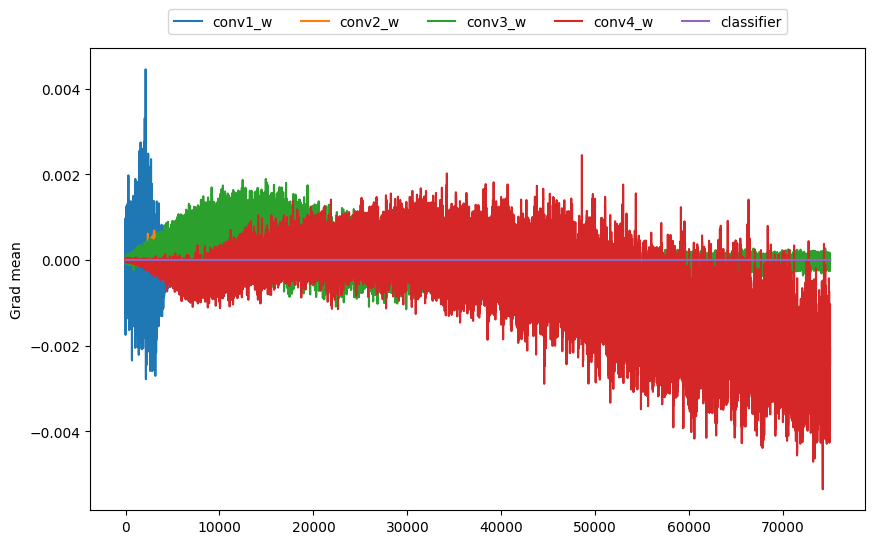

In [37]:
 # 그래프를 그릴 컬럼들의 리스트
columns_to_plot = [ 'layer_dict.conv0.conv.weight_grad_mean', 
                    'layer_dict.conv1.conv.weight_grad_mean', 
                    'layer_dict.conv2.conv.weight_grad_mean',
                    'layer_dict.conv3.conv.weight_grad_mean',
                    'layer_dict.linear.weights_grad_mean']
columns_to_plot_label = ['conv1_w', 
                         'conv2_w', 
                         'conv3_w', 
                         'conv4_w', 
                         'classifier']

# 특정 열(Column)의 값을 그래프로 그리기
plt.figure(figsize=(10, 6))  # 그래프의 크기 설정 

plt.plot(gr[columns_to_plot].values, label=columns_to_plot_label)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), shadow=False, ncol=len(columns_to_plot))  # 범례 추가
plt.ylabel('Grad mean')  

# MAML의 Scale과 맞춘다
#plt.ylim([-0.006, 0.006])

plt.show()  # 그래프 보여주기

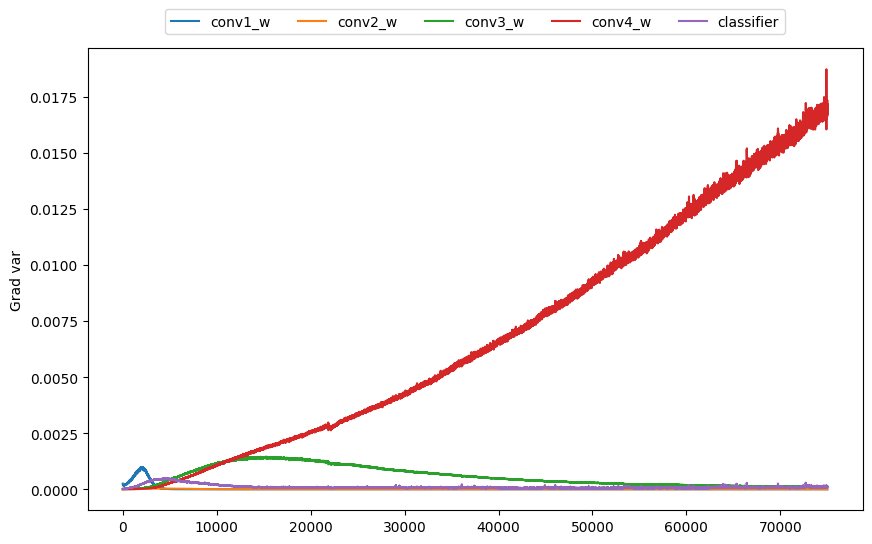

In [38]:
 # 그래프를 그릴 컬럼들의 리스트
columns_to_plot = [ 'layer_dict.conv0.conv.weight_grad_var', 
                    'layer_dict.conv1.conv.weight_grad_var', 
                    'layer_dict.conv2.conv.weight_grad_var',
                    'layer_dict.conv3.conv.weight_grad_var',
                    'layer_dict.linear.weights_grad_var'
]
columns_to_plot_label = ['conv1_w', 
                         'conv2_w', 
                         'conv3_w', 
                         'conv4_w', 
                         'classifier'
]

# 특정 열(Column)의 값을 그래프로 그리기
plt.figure(figsize=(10, 6))  # 그래프의 크기 설정 

plt.plot(gr[columns_to_plot].values, label=columns_to_plot_label)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), shadow=False, ncol=len(columns_to_plot))  # 범례 추가
plt.ylabel('Grad var')  

# plt.ylim([0.000, 0.02])

plt.show()  # 그래프 보여주기

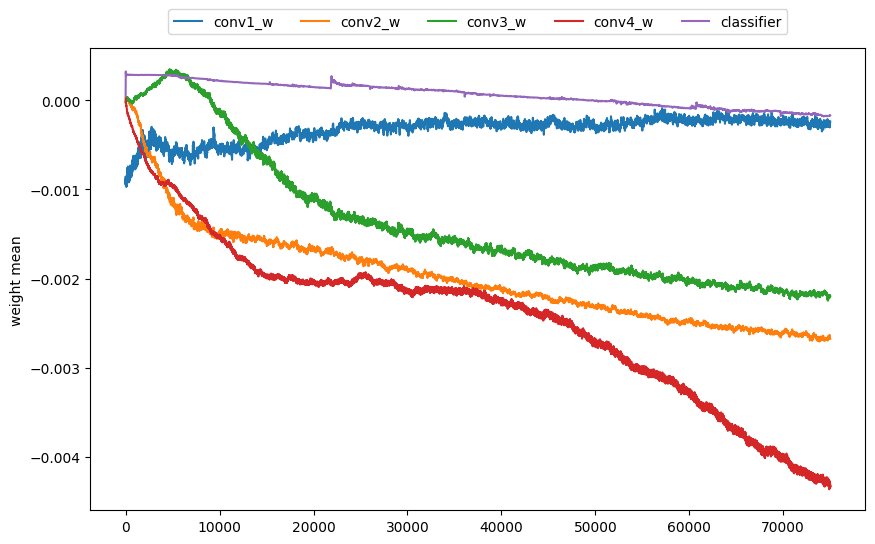

In [39]:
 # 그래프를 그릴 컬럼들의 리스트
columns_to_plot = [ 'layer_dict.conv0.conv.weight_weight_mean', 
                    'layer_dict.conv1.conv.weight_weight_mean', 
                    'layer_dict.conv2.conv.weight_weight_mean',
                    'layer_dict.conv3.conv.weight_weight_mean',
                    'layer_dict.linear.weights_weight_mean']
columns_to_plot_label = ['conv1_w', 
                         'conv2_w', 
                         'conv3_w', 
                         'conv4_w', 
                         'classifier']

# 특정 열(Column)의 값을 그래프로 그리기
plt.figure(figsize=(10, 6))  # 그래프의 크기 설정 

plt.plot(gr[columns_to_plot].values, label=columns_to_plot_label)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), shadow=False, ncol=len(columns_to_plot))  # 범례 추가
plt.ylabel('weight mean')  

# plt.yscale('log')  # Y 축을 로그 스케일로 변경
# plt.ylim(10 ** -5, 10 **2)

plt.show()  # 그래프 보여주기

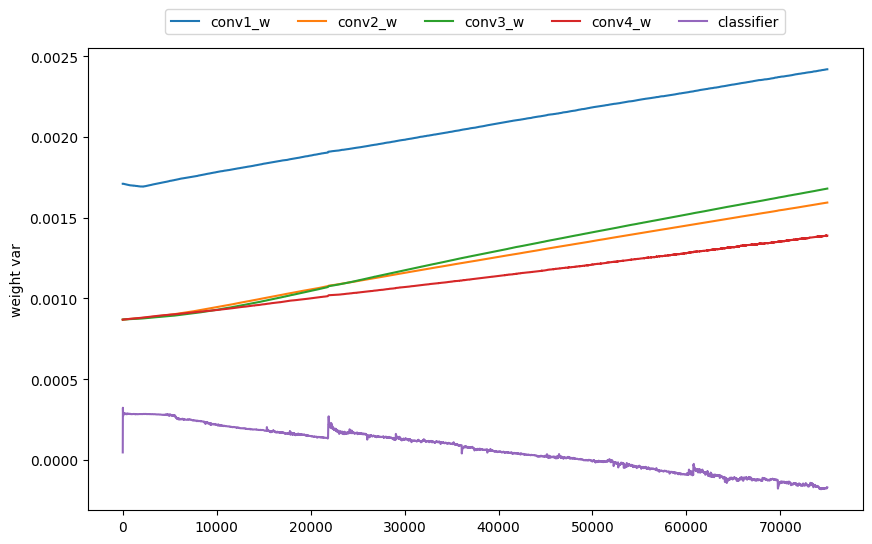

In [40]:
 # 그래프를 그릴 컬럼들의 리스트
columns_to_plot = [ 'layer_dict.conv0.conv.weight_weight_var', 
                    'layer_dict.conv1.conv.weight_weight_var', 
                    'layer_dict.conv2.conv.weight_weight_var',
                    'layer_dict.conv3.conv.weight_weight_var',
                    'layer_dict.linear.weights_weight_mean']
columns_to_plot_label = ['conv1_w', 
                         'conv2_w', 
                         'conv3_w', 
                         'conv4_w', 
                         'classifier']

# 특정 열(Column)의 값을 그래프로 그리기
plt.figure(figsize=(10, 6))  # 그래프의 크기 설정 

plt.plot(gr[columns_to_plot].values, label=columns_to_plot_label)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), shadow=False, ncol=len(columns_to_plot))  # 범례 추가
plt.ylabel('weight var')  

# plt.yscale('log')  # Y 축을 로그 스케일로 변경
# plt.ylim(10 ** -5, 10 **2)

plt.show()  # 그래프 보여주기

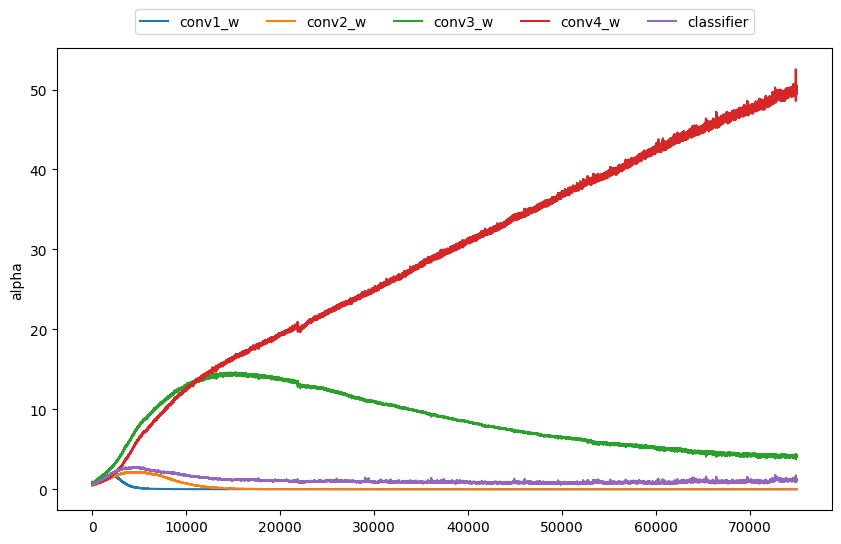

In [41]:
 # 그래프를 그릴 컬럼들의 리스트
columns_to_plot = [ 'layer_dict.conv0.conv.weight_alpha', 
                    'layer_dict.conv1.conv.weight_alpha', 
                    'layer_dict.conv2.conv.weight_alpha',
                    'layer_dict.conv3.conv.weight_alpha',
                    'layer_dict.linear.weights_alpha']
columns_to_plot_label = ['conv1_w', 
                         'conv2_w', 
                         'conv3_w', 
                         'conv4_w', 
                         'classifier']

# 특정 열(Column)의 값을 그래프로 그리기
plt.figure(figsize=(10, 6))  # 그래프의 크기 설정 

plt.plot(gr[columns_to_plot].values, label=columns_to_plot_label)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), shadow=False, ncol=len(columns_to_plot))  # 범례 추가
plt.ylabel('alpha')  

# plt.yscale('log')  # Y 축을 로그 스케일로 변경
# plt.ylim(10 ** -5, 10 **2)

plt.show()  # 그래프 보여주기

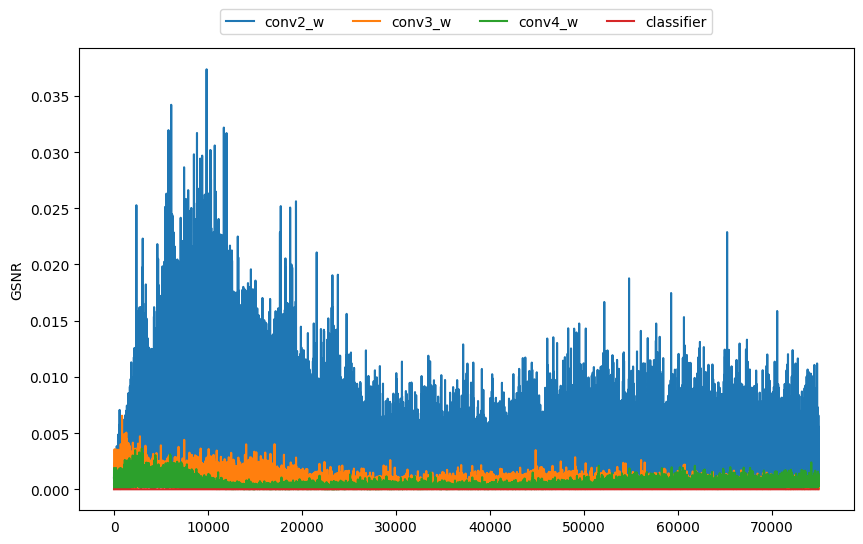

In [44]:
 # 그래프를 그릴 컬럼들의 리스트
columns_to_plot = [ #'layer_dict.conv0.conv.weight_gsnr', 
                    'layer_dict.conv1.conv.weight_gsnr', 
                    'layer_dict.conv2.conv.weight_gsnr',
                    'layer_dict.conv3.conv.weight_gsnr',
                    'layer_dict.linear.weights_gsnr']
columns_to_plot_label = [#'conv1_w', 
                         'conv2_w', 
                         'conv3_w', 
                         'conv4_w', 
                         'classifier']

# 특정 열(Column)의 값을 그래프로 그리기
plt.figure(figsize=(10, 6))  # 그래프의 크기 설정 

plt.plot(gr[columns_to_plot].values, label=columns_to_plot_label)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), shadow=False, ncol=len(columns_to_plot))  # 범례 추가
plt.ylabel('GSNR')  

# plt.yscale('log')  # Y 축을 로그 스케일로 변경
# plt.ylim(10 ** -5, 10 **2)

plt.show()  # 그래프 보여주기